## 1- DataJoint & Bdata Overview

Overview tutorial for interacting with Brody Lab DataJoint SQL-based database. This notebook assumes you have followed the installation steps [here](https://github.com/Brody-Lab/bl_pipeline_python).

Written by Jess Breda February 2023

### 1. Libraries

In [28]:
import datajoint as dj
dj.blob.use_32bit_dims = True # not using blob columns
import numpy as np
import pandas as pd

from fetch_water import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
dj.conn() #check connection is working

DataJoint connection (connected) jbreda@bdata00.pni.princeton.edu:3306

### 2. What is on DataJoint?

`Schemas` are groups of tables that are similar and the highest structure level.

**Schemas > Tables > Columns > Entries**

In [30]:
dj.list_schemas()

['bdata', 'ratinfo']

To read from the tables you will create a `virtual module`. This is the *whole* basis of DataJoint- connecting you from your interpreter (python, matlab etc) to your SQL database

In [31]:
# __name__ =                    (__name__, schema name)
bdata = dj.create_virtual_module("bdata", "bdata")
ratinfo = dj.create_virtual_module("intfo", "ratinfo")

There are nice visual ways to demonstrate relationships of tables in a `schema`, but sadly this code doesn't seem compatible with our dbs currently. Instead, let's list all the tables in each `schema`. Many will seem familiar from the old Zut webpage. 

In [32]:
bdata_table_names = dir(bdata)

print(f"Tables under bdata schema: \n {bdata_table_names[:-6]}") # removing the __vars__


Tables under bdata schema: 
 ['BehaviorEvent', 'Biasview', 'CalibrationInfoTbl', 'Carlosexperiment', 'Carlosview', 'Cells', 'Channels', 'Events', 'Gcs', 'GcsOld', 'Jeffsview', 'Labmember', 'NewCalibrationInfoTbl', 'OrphanedSessions', 'PaSess', 'ParsedEvents', 'Paview', 'PhysSess', 'ProtocolInfo', 'RawTracking', 'RigErrorLog', 'SessList', 'SessStarted', 'Sessions', 'Sessview', 'Spktimes', 'TechnicianNotesTbl', 'Tetrodes', 'Tracking']


In [33]:
ratinfo_table_names = dir(ratinfo)
print(f"Tables under ratinfo schema: \n {ratinfo_table_names[:-6]}")

Tables under ratinfo schema: 
 ['CerebroSessions', 'Contacts', 'Eibs', 'Experiment', 'Infusions', 'Mass', 'PaOpto', 'Phys', 'RatHistory', 'Rats', 'RigMaintenance', 'Rigflush', 'Rigfood', 'Riginfo', 'Rigs', 'Rigtrials', 'Rigvideo', 'Rigwater', 'SchedRescue', 'Schedule', 'Stim', 'Surgery', 'TechSchedule', 'Technotes', 'TrainingRoom', 'TurnDownLog', 'VideoLog', 'Videoinfo', 'Water']


### 3. Descriptive information for a table

Let's look at the descriptions (i.e. columns) for the [sessions table](https://zut-bdata00.pni.princeton.edu/sessions.php).

In [34]:
print(bdata.Sessions.describe())

# data from all rat sessions
sessid               : int                          
---
ratname=""           : varchar(30)                  
hostname=""          : varchar(30)                  
experimenter=""      : varchar(30)                  
starttime="00:00:00" : time                         
endtime="00:00:00"   : time                         
sessiondate="0000-00-00" : date                         
n_done_trials=0      : int                          
comments=null        : varchar(1000)                
settings_file=""     : varchar(200)                 
settings_path=""     : varchar(200)                 
data_file=""         : varchar(200)                 
data_path=""         : varchar(200)                 
video_file=""        : varchar(200)                 
video_path=""        : varchar(200)                 
protocol=""          : varchar(30)                  
total_correct=null   : float(2,2)                   
right_correct=null   : float(2,2)                   
left_corr

Let's see what the data actually looks like in the table by making a query to a specific table.

In [35]:
bdata.Sessions()

sessid,ratname,hostname,experimenter,starttime,endtime,sessiondate,n_done_trials,comments,settings_file,settings_path,data_file,data_path,video_file,video_path,protocol,total_correct,right_correct,left_correct,percent_violations,brokenbits,protocol_data,left_pokes,center_pokes,right_pokes,technotes,IP_addr,crashed,foodpuck
0,J064,Rig25,Jeff,13:07:47,15:11:25,2010-09-20,243,,,,data_@ProAnti2_Jeff_J064_100920a,\ratter\solodata\Data\Jeff\J064\,,,ProAnti2,0.74,0.75,0.74,0.1,0,=BLOB=,3978,720,6490,,0.0.0.0,None,0
3,J006,mol-cce788,Jeff,19:50:01,19:54:23,2007-12-29,23,None,,,,,,,ProAnti2,0.5,0.55,0.4,0.3,0,=BLOB=,None,None,None,None,None,None,0
4,C018,brodyrigxp14,Carlos,8:41:48,10:14:54,2007-12-30,205,None,,,,,,,ProAnti2,0.61,0.58,0.66,0.0,0,=BLOB=,None,None,None,None,None,None,0
5,C017,brodyrigxp10,Carlos,9:00:57,10:33:15,2007-12-30,289,None,,,,,,,ProAnti2,0.56,0.53,0.59,0.0,0,=BLOB=,None,None,None,None,None,None,0
6,J005,brodyrigxp11,Jeff,8:59:08,10:33:22,2007-12-30,195,None,,,,,,,ProAnti2,0.67,0.82,0.59,0.0,0,=BLOB=,None,None,None,None,None,None,0
7,Elk062,brodyrigxp04,Jeff,9:06:32,10:40:22,2007-12-30,142,None,,,,,,,ProAnti2,0.54,0.53,0.55,0.01,0,=BLOB=,None,None,None,None,None,None,0
8,J002,brodyrigxp08,Jeff,8:59:09,10:34:38,2007-12-30,180,None,,,,,,,ProAnti2,0.54,0.52,0.58,0.0,0,=BLOB=,None,None,None,None,None,None,0
9,J001,brodyrigxp09,Jeff,9:03:37,10:39:47,2007-12-30,228,None,,,,,,,ProAnti2,0.71,0.68,0.75,0.0,0,=BLOB=,None,None,None,None,None,None,0
10,J007,brodyrigxp15,Jeff,9:00:08,10:37:12,2007-12-30,210,None,,,,,,,ProAnti2,0.69,0.67,0.71,0.0,0,=BLOB=,None,None,None,None,None,None,0
11,J008,brodyrigxp13,Jeff,8:59:25,10:36:47,2007-12-30,177,None,,,,,,,ProAnti2,0.75,0.75,0.74,0.0,0,=BLOB=,None,None,None,None,None,None,0


Great, we can access all the Session information. Some tables have even more descriptive information like the [Registry](https://zut-bdata00.pni.princeton.edu/rats.php) (which is stored under `Rats`)

In [36]:
print(ratinfo.Rats.describe())

# Brody Lab Rats
internalID           : int unsigned auto_increment  
---
free=0               : tinyint                      # whether or not the rat is available for use by any other experimenter
alert=0              : tinyint                      # whether or not there is an alert for special attention for the rat (e.g. sick, recent surgery, etc.)
experimenter=null    : varchar(20)                  # name of the experimenter
contact=null         : varchar(40)                  
ratname=null         : varchar(4)                   # name of the rat
training=0           : tinyint                      
comments=null        : varchar(500)                 
vendor="Taconic"     : varchar(40)                  # e.g. Taconic, Charles River, etc.
waterperday=30       : int                          # 0 for free water, otherwise the number of minutes the rat has access to water each day (may vary over time)
recovering=0         : tinyint                      # whether or not the rat is currently

We can even `fetch` a single columns. For example all of the experimenters that have had a rat registered to them.

In [37]:
experimenters = ratinfo.Rats.fetch('experimenter')
print(f"All Animal Experimenters: \n {np.unique(experimenters)}")

All Animal Experimenters: 
 ['' 'Adrian' 'Ahmed' 'Alex' 'Amanda' 'Amir' 'AnimalFacility' 'Ann' 'Anna'
 'Anna ' 'Athena' 'Ben' 'Ben ' 'Bing' 'Carlos' 'Cecilia' 'Christine'
 'Chuck' 'Diksha' 'Dmitriy' 'Elyssa' 'Emily' 'Jeff' 'Jess' 'JessB' 'Joe'
 'Jordan' 'Jorge' 'Josh' 'Jovanna' 'Jovanna ' 'Jovanna/Min' 'Julie'
 'Kevin' 'Marino' 'Max' 'Michael' 'Min' 'Nick' 'Peter' 'Peter Bibawi'
 'Rina' 'Sachi' 'SarahJo' 'Sergei' 'Shraddha' 'Shraddha ' 'Thomas' 'Tim'
 'Tommy' 'Tyler' 'Verity' 'Wynne' 'abondy' 'christine' 'experimenter'
 'jovanna' 'pbibawi' 'velliott']


### 4. Querying tables usings keys

#### 4.1 Exact Queries
What if you don't want the whole sessions table? There are multiple levels at which you can query a table using a `key`, which is a dictionary filter for a given column. Let's get data for a **single session** for one of my animals `R500`. Since we are only fetching 1 thing we will call `fetch1`. You could use just `fetch` but it will add additional dimensions that are hard to get rid of.

In [38]:
key = {'sessid' : '906302'}
r500_session = (bdata.Sessions & key).fetch1()

r500_session.keys()

dict_keys(['sessid', 'ratname', 'hostname', 'experimenter', 'starttime', 'endtime', 'sessiondate', 'n_done_trials', 'comments', 'settings_file', 'settings_path', 'data_file', 'data_path', 'video_file', 'video_path', 'protocol', 'total_correct', 'right_correct', 'left_correct', 'percent_violations', 'brokenbits', 'protocol_data', 'left_pokes', 'center_pokes', 'right_pokes', 'technotes', 'IP_addr', 'crashed', 'foodpuck'])

In it's current form this returns a huge array. You can print it if you want but it's ugly. Instead, we can **format** our `fetch` into a `DataFrame` so it's more accessible. This is easiest to see when we fetch **all** the sessions for an animal.

In [39]:
key = {"ratname" : "R500"}
r500_sessions = pd.DataFrame((bdata.Sessions & key).fetch(as_dict=True))
r500_sessions.head()


,sessid,ratname,hostname,experimenter,starttime,endtime,sessiondate,n_done_trials,comments,settings_file,...,percent_violations,brokenbits,protocol_data,left_pokes,center_pokes,right_pokes,technotes,IP_addr,crashed,foodpuck
0,879474,R500,Rig404,Jess,0 days 10:49:46,0 days 11:57:01,2022-07-19,28,JB_cpoke_nofix ; ...,,...,0.0,0,[[[[[0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0....,520,612,704,,128.112.222.46,None,0
1,879662,R500,Rig404,JessB,0 days 11:38:31,0 days 12:27:40,2022-07-20,53,JB_cpoke_nofix ; ...,,...,0.0,0,[[[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1....,158,196,172,,128.112.222.46,None,0
2,879811,R500,Rig404,JessB,0 days 10:26:37,0 days 11:27:59,2022-07-21,10,JB_cpoke_nofix ; ...,,...,0.0,0,"[[[[[1. 1. 0. 0. 1. 1. 1. 1. 1. 0.]], [[0. 0. ...",124,308,112,,128.112.222.46,None,0
3,879983,R500,Rig404,JessB,0 days 09:05:23,0 days 09:51:26,2022-07-22,5,JB_cpoke_nofix ; ...,,...,0.0,0,"[[[[[0. 0. 0. 1. 1.]], [[1. 1. 1. 0. 0.]], ['r...",78,224,110,,128.112.222.46,None,0
4,880131,R500,Rig404,JessB,0 days 09:24:37,0 days 10:10:42,2022-07-23,6,JB_cpoke_nofix ; ...,,...,0.0,0,"[[[[[1. 1. 0. 1. 1. 0.]], [[0. 0. 1. 0. 0. 1.]...",98,48,96,,128.112.222.46,None,0


This is nice because you can easily index into the table to get session level information.

In [40]:
session_number = 7
print(f"On {r500_sessions['sessiondate'][session_number]}, {r500_sessions['n_done_trials'][session_number]} trials were done.")

On 2022-07-26, 88 trials were done.


Finally, lets grab all the sessions for **multiple** animals. This requires using list comprehension to make a set of `keys`.


In [41]:
animals = ['R500', 'R501', 'R502']
keys = [{'ratname' : animal} for animal in animals]

multi_animal_sessions = pd.DataFrame((bdata.Sessions & keys).fetch(as_dict=True))

print(f"Animal names: {multi_animal_sessions.ratname.unique()}")

Animal names: ['R500' 'R501' 'R502']


#### 4.2 Logical Queries

Sometimes you might want to query information in a certain data range rather than a specific session or animal.

In [42]:
february_mass_table = ratinfo.Mass & 'date > "2023-02-01"'
print(f"{len(february_mass_table)} weighing instances this month")

2234 weighing instances this month


You can also do ranges (using SQL syntax) and stack multiple keys.

In [43]:
animal_count_2022 = ratinfo.Rats & 'deliverydate between "2022-01-01" and "2022-12-31"' & {'experimenter' : "JessB"}
print(f"JessB had {len(animal_count_2022)} animals delivered in 2022")

JessB had 5 animals delivered in 2022


For additional advanced operations (column renaming, table merging, column creation, computations across tables) see Alvaro's [notebook](https://github.com/Brody-Lab/bl_pipeline_python/blob/main/notebooks/tutorials/1-Explore%20U19%20data%20pipeline%20with%20DataJoint.ipynb). Just note the schema names have changed since he wrote it.

### 5 Exercise- Getting Water & Mass Data

Something I do nearly every day is check how much water my animals get relative to their restriction volume and where that water came from (rig or pub). 

I've written some started code to calculate the restriction volume. To complete this, we need to determine how much water was drunk in the rig versus in the pub (and where that information is stored).

#### 5.1 Restriction Target

To calculate the restriction target, you need to locate the % of body weight restriction (in `ratinfo.Registry[comments]` or `ratinfo.Water[percent_target]`) and the mass of the animal (`ratinfo.Mass[mass]`) to calculate the volume. For more details look in `fetch_water.py`

In [44]:
ANIMAL_ID = "R501"
DATE = "2023-02-15"

volume_target = fetch_daily_water_target(animal_id=ANIMAL_ID, date=DATE, verbose=True)

On 2023-02-15 R501 is restricted to:
        4.0% of body weight or 0.95 mL
        


#### 5.2 Rig & Water Volumes

The goal of this exercise will be to locate where the **pub** and **rig** volumes are stored in the database.

In [45]:
print(f"Tables under ratinfo schema: \n {ratinfo_table_names[:-6]}")

Tables under ratinfo schema: 
 ['CerebroSessions', 'Contacts', 'Eibs', 'Experiment', 'Infusions', 'Mass', 'PaOpto', 'Phys', 'RatHistory', 'Rats', 'RigMaintenance', 'Rigflush', 'Rigfood', 'Riginfo', 'Rigs', 'Rigtrials', 'Rigvideo', 'Rigwater', 'SchedRescue', 'Schedule', 'Stim', 'Surgery', 'TechSchedule', 'Technotes', 'TrainingRoom', 'TurnDownLog', 'VideoLog', 'Videoinfo', 'Water']


In [46]:
print(ratinfo.Water.describe())

# Watering Records
---
date                 : date                         
rat                  : varchar(4)                   
tech=null            : varchar(4)                   
starttime=null       : time                         
stoptime=null        : time                         
watering             : int auto_increment           
volume=0.000         : decimal(6,3)                 
percent_bodymass=0.000 : decimal(6,3)                 
percent_target=0.000 : decimal(6,3)                 
citricacid=null      : tinyint unsigned zerofill    



In [47]:
print(ratinfo.Rigwater.describe())

id                   : int unsigned auto_increment  
---
ratname              : varchar(4)                   
dateval              : date                         
totalvol             : decimal(10,5)                
trialvol             : decimal(10,5)                
complete             : tinyint unsigned             
n_rewarded_trials    : int unsigned                 
target_percent=null  : decimal(5,2)                 



In [48]:
Water_keys = {"rat" : ANIMAL_ID, "date" : DATE} # specific to Water table
pub_volume = float((ratinfo.Water & Water_keys).fetch('volume').max())


Rig_keys = {"ratname" : ANIMAL_ID, "dateval" : DATE} # Specific to Rigwater table
rig_volume = float((ratinfo.Rigwater & Rig_keys).fetch1('totalvol'))


#### 5.3 Visualize

enter the `rig_volume` and `pub_volume` amounts into the function below to run it

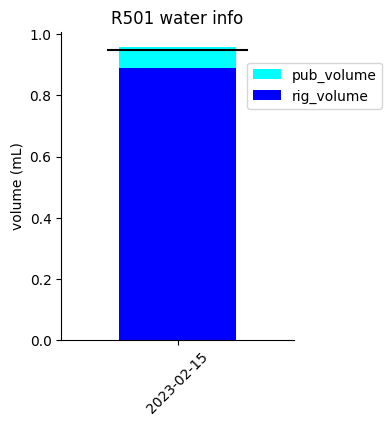

In [49]:
plot_daily_water(volume_target, rig_volume, pub_volume, ANIMAL_ID, DATE)